<a href="https://colab.research.google.com/github/Spacelostghost69/Stock-Market-Prediction/blob/main/Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Predictor

enter the name of the stock to predictRELIANCE.NS


[*********************100%***********************]  1 of 1 completed


R² Score (Accuracy): 68.21%


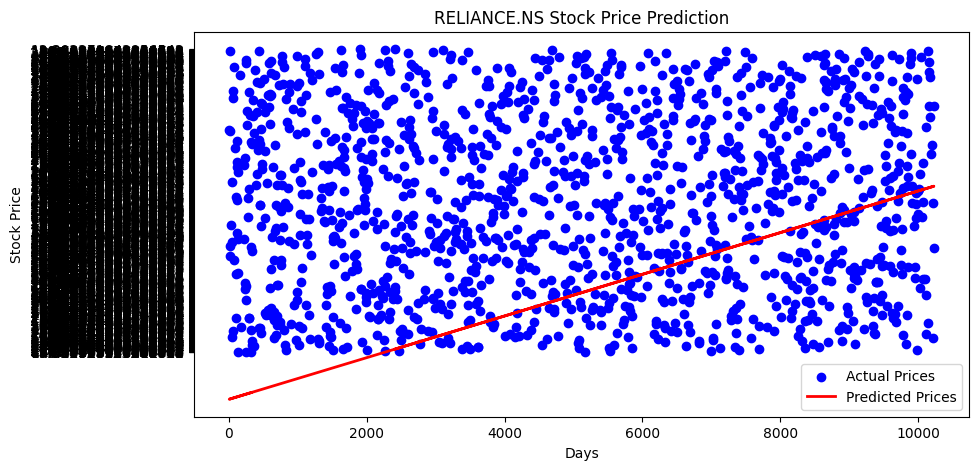

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
ticker=input('enter the name of the stock to predict')
data = yf.download(ticker, start="1900-01-01", end="2024-01-01", auto_adjust=True)
data = data.reset_index()
data.to_csv("TCS.csv", index=False)
df = pd.read_csv("TCS.csv", parse_dates=["Date"])
df.ffill(inplace=True)
df.dropna(inplace=True)
df['Day'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Day']]
y = df['Close']

if X.isnull().values.any() or y.isnull().values.any():
    print("Error: X or y contains NaN values. Exiting.")
    exit()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")

plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color="blue", label="Actual Prices")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title(f"{ticker} Stock Price Prediction")
plt.legend()
plt.show()